# Explore and Visualize the Data & Find Relevant Features

In [2]:
!pip install tqdm

    100% |████████████████████████████████| 51kB 3.2MB/s ta 0:00:011


In [3]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [4]:
from pprint import pprint
from tqdm import tqdm

In [5]:
pwd

'/home/jovyan/ipynb'

In [8]:
madelon_test_10 = pd.read_pickle('../assets/pickled_samples/madelon_test_10.p')
madelon_train_10 = pd.read_pickle('../assets/pickled_samples/madelon_sample_train.p')
madelon_train_label10 = pd.read_pickle('../assets/pickled_samples/madelon_sample_train_labels.p')
madelon_valid_10= pd.read_pickle('../assets/pickled_samples/madelon_valid10.p')

In [9]:
cook_sample = pd.read_pickle('../assets/pickled_samples/cook_total_samples.p')

### Examine and 'clean' the Data

### Madelon Dataset

In [10]:
madelon_test_10.shape
madelon_test_10.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
1763,497,514,513,491,504,480,490,478,478,483,...,480,490,481,479,546,482,502,488,498,NaN
1201,483,512,606,488,532,487,532,479,487,477,...,477,491,730,512,521,475,493,475,515,NaN
1303,476,455,501,491,454,481,537,476,489,473,...,479,493,205,545,517,478,475,556,526,NaN
210,482,455,509,456,528,470,561,475,485,468,...,483,528,585,513,530,480,530,445,489,NaN
507,474,530,480,469,435,489,470,474,480,468,...,482,474,585,459,442,477,477,504,505,NaN


Would need to impute the 500 column with the predicted values of -1 or 1 after the classification model is complete and the madelon_test_10 set is passed in to generate predictions.

In [11]:
madelon_train_10.head(5)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
1239,492,526,464,476,500,479,445,475,488,467,...,521,477,489,456,487,486,484,467,507,469
1252,479,488,615,478,476,485,471,476,496,475,...,479,473,472,287,479,493,473,465,496,484
988,474,505,502,469,494,477,409,478,500,485,...,500,463,497,482,482,521,482,482,469,456
457,493,499,534,491,489,480,530,479,487,473,...,487,484,496,383,477,486,491,472,549,499
886,476,518,504,486,502,478,460,474,486,480,...,466,480,475,682,506,489,486,468,505,501


In [12]:
madelon_train_label10.head(5)

1239    1
1252   -1
988    -1
457     1
886     1
Name: target, dtype: int64

In [13]:
madelon_valid_10.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
111,500,495,531,466,504,478,482,476,478,481,...,483,515,597,484,589,478,481,481,470,NaN
433,489,476,512,473,419,487,449,478,521,486,...,475,462,658,464,527,479,509,472,487,NaN
337,477,481,559,486,502,481,488,476,484,478,...,479,505,358,446,476,476,500,534,488,NaN
391,481,507,521,480,584,483,536,478,504,474,...,477,476,510,506,501,476,488,560,476,NaN
154,488,455,540,489,467,477,505,478,527,489,...,474,503,531,461,581,479,498,524,533,NaN


**Madelon datasets to go back and predict -1, 1 on:**
- madelon_valid_10
- madelon_test_10

In [14]:
def drop_last_column_permanent (dataframe):
    last_column_index = dataframe.shape[1]-1
    df = dataframe.drop(last_column_index, axis=1, inplace=True)
    return df

In [15]:
drop_last_column_permanent(madelon_test_10)

In [16]:
madelon_test_10.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
864,483,483,496,503,421,478,469,476,526,497,...,500,480,488,531,481,559,488,475,431,504
1435,485,417,540,478,501,475,557,476,475,480,...,492,484,432,623,475,444,484,492,472,470
1049,483,488,490,473,459,481,475,476,507,474,...,512,478,470,290,449,535,483,466,496,467
110,471,518,464,467,451,480,564,477,504,487,...,469,474,435,555,490,478,477,471,452,513
999,484,505,469,481,472,474,486,477,489,480,...,455,484,519,609,483,503,485,473,504,484


In [17]:
drop_last_column_permanent(madelon_valid_10)

In [18]:
madelon_valid_10.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
111,500,495,531,466,504,478,482,476,478,481,...,485,483,515,597,484,589,478,481,481,470
433,489,476,512,473,419,487,449,478,521,486,...,484,475,462,658,464,527,479,509,472,487
337,477,481,559,486,502,481,488,476,484,478,...,472,479,505,358,446,476,476,500,534,488
391,481,507,521,480,584,483,536,478,504,474,...,474,477,476,510,506,501,476,488,560,476
154,488,455,540,489,467,477,505,478,527,489,...,465,474,503,531,461,581,479,498,524,533


### Cook Sample Data Set

This was taken from Josh Cook's database where Josh Cook used sklearn's make_classification to generate 220,000 samples and 1,000 features. It is unknown how many features are informative, redundant, or noise.

In [20]:
cook_sample.shape

(6600, 1002)

In [21]:
cook_sample.head()

,_id,feat_000,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,...,feat_991,feat_992,feat_993,feat_994,feat_995,feat_996,feat_997,feat_998,feat_999,target
0,35870,0.371429,1.557665,0.088738,-0.568426,0.279411,0.553009,-2.263165,0.322735,-0.770665,...,-0.006892,0.504680,-1.534529,0.120796,1.485370,0.481770,0.499728,-2.032250,-0.245348,1
1,92973,-0.044490,-1.042972,0.245990,-0.187297,1.355108,-0.086559,-0.409865,-0.156749,-0.388948,...,-0.363377,-0.313348,-0.518927,-0.515884,0.345514,-0.140779,-0.113291,1.161730,-0.616847,0
2,56479,0.043489,0.440636,0.047697,-1.933592,1.219459,0.182951,-2.266318,-0.721327,0.510775,...,-1.811937,0.563980,1.152395,-0.060437,-0.723646,0.529993,1.599007,-0.053172,0.581611,0
3,119182,0.567497,0.313351,0.744730,-1.350541,-0.068053,0.588990,0.290120,0.229521,0.848661,...,0.308947,-0.315620,-0.703337,0.499579,1.128113,-0.067667,0.086741,-0.861531,0.361497,1
4,34782,-0.111258,-0.682838,-0.561106,-0.381560,0.540490,-1.115611,-1.473109,0.728398,-0.267222,...,1.522104,-0.325736,0.967692,0.919213,2.192081,-0.672942,-0.325374,-0.782994,0.662257,1


In [22]:
# extract the target from the sample
# extract the id from the sample

cook_target = cook_sample.iloc[:, -1]
cook_features = cook_sample.iloc[:, 1:-1]

In [23]:
display(cook_target.shape)
display(cook_features.shape)

(6600,)

(6600, 1000)

### Explore and Visualize Some Features

- I'm only going to visualize and explore the features from both the Madelon dataset and from the Cook sample. The Madelon data set has 500 features, and the Cook sample has 1000 features (excluding the target and the id number). 
- Since there are 500 features in the Madelon dataset and 1,000 features in the Cook dataset, I randomly sampled 10% from each dataset to visualize instead of visualizing all 500 and 1,000 from each of the respective datasets.

#### Sample the features from each of the respective datasets

In [20]:
madelon_sampled_cols = madelon_train_10.sample(50, axis=1)
madelon_sampled_cols.sample(5)

,297,265,286,149,453,292,393,76,38,290,...,14,239,211,318,488,214,464,461,87,384
1263,535,488,478,487,591,490,443,489,471,474,...,450,474,417,430,501,474,466,459,490,473
1159,606,490,429,531,398,469,498,485,483,446,...,473,486,492,518,462,478,487,468,491,489
1544,435,462,493,503,564,501,473,487,489,453,...,458,482,515,489,485,476,499,484,487,490
1871,472,467,467,475,382,498,517,486,476,505,...,476,484,480,453,502,471,464,498,494,484
127,489,470,479,512,544,506,430,487,480,516,...,486,477,515,444,479,481,522,493,481,488


In [21]:
cook_sampled_cols = cook_features.sample(100, axis=1)
cook_sampled_cols.sample(5)

,feat_532,feat_269,feat_800,feat_344,feat_606,feat_741,feat_177,feat_907,feat_738,feat_980,...,feat_121,feat_223,feat_513,feat_552,feat_151,feat_771,feat_080,feat_913,feat_806,feat_456
375,1.153363,-3.020757,0.315086,0.132400,0.728743,1.096075,-0.084408,0.691685,0.277459,-1.798983,...,0.425758,1.553408,-1.800932,1.631209,-1.928116,0.916545,0.881615,0.979468,-0.501155,0.720741
308,-2.258729,2.471881,-1.081404,-0.289189,0.125513,0.251904,-0.191038,1.363569,1.278758,0.283792,...,-0.608735,-0.347289,0.915721,0.133638,0.745972,-0.691433,0.239360,-0.170661,-0.512200,-0.071771
398,0.611023,-4.936952,1.213300,0.902862,-1.011907,-0.454060,0.176584,0.420442,-0.714303,-0.830961,...,1.085441,-0.802680,1.690037,-1.152159,-1.388066,-0.012198,-0.651137,0.775998,-0.470133,0.176477
7,0.523595,0.815662,1.382688,1.086135,0.495761,-0.433599,-0.046170,1.407091,-0.999611,-0.663315,...,0.091966,-0.374803,-1.165114,-0.426054,0.375233,0.014220,-1.207058,-1.173681,-0.513554,1.117577
429,0.028777,-4.949372,0.136989,-0.034421,1.810276,-0.309026,-0.959688,0.302579,0.839297,0.437593,...,-0.625069,0.472083,-0.165525,0.326304,0.882144,-0.820987,-1.242530,-1.778426,1.597746,-0.055005


#### Visualize the sampled columns (50 from Madelon, 100 from Cook)

In [22]:
def distplot_df_cols (df):
    '''
    cannot handle a dataframe with more than 100 columns
    '''
    fig = plt.figure(1, figsize=(20,40))
    
    for i in range(len(df.columns)):
        fig.add_subplot(20,5,i+1)
        sns.distplot(df.iloc[i])
        plt.axvline(df[df.columns[i]].mean(), c='red')
        plt.axvline(df[df.columns[i]].median(), c='black')

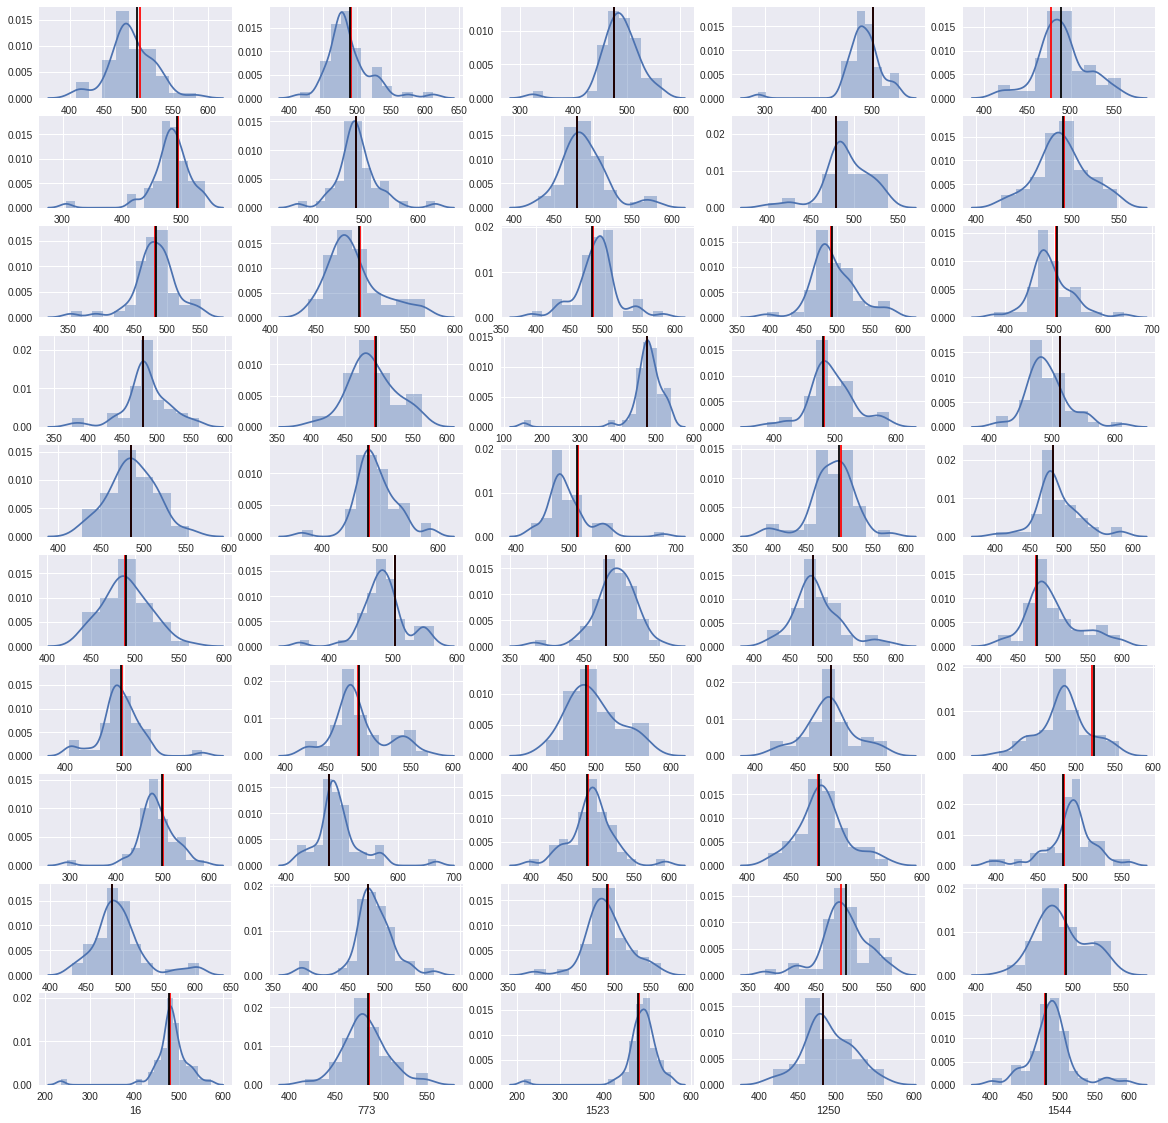

In [23]:
distplot_df_cols(madelon_sampled_cols)

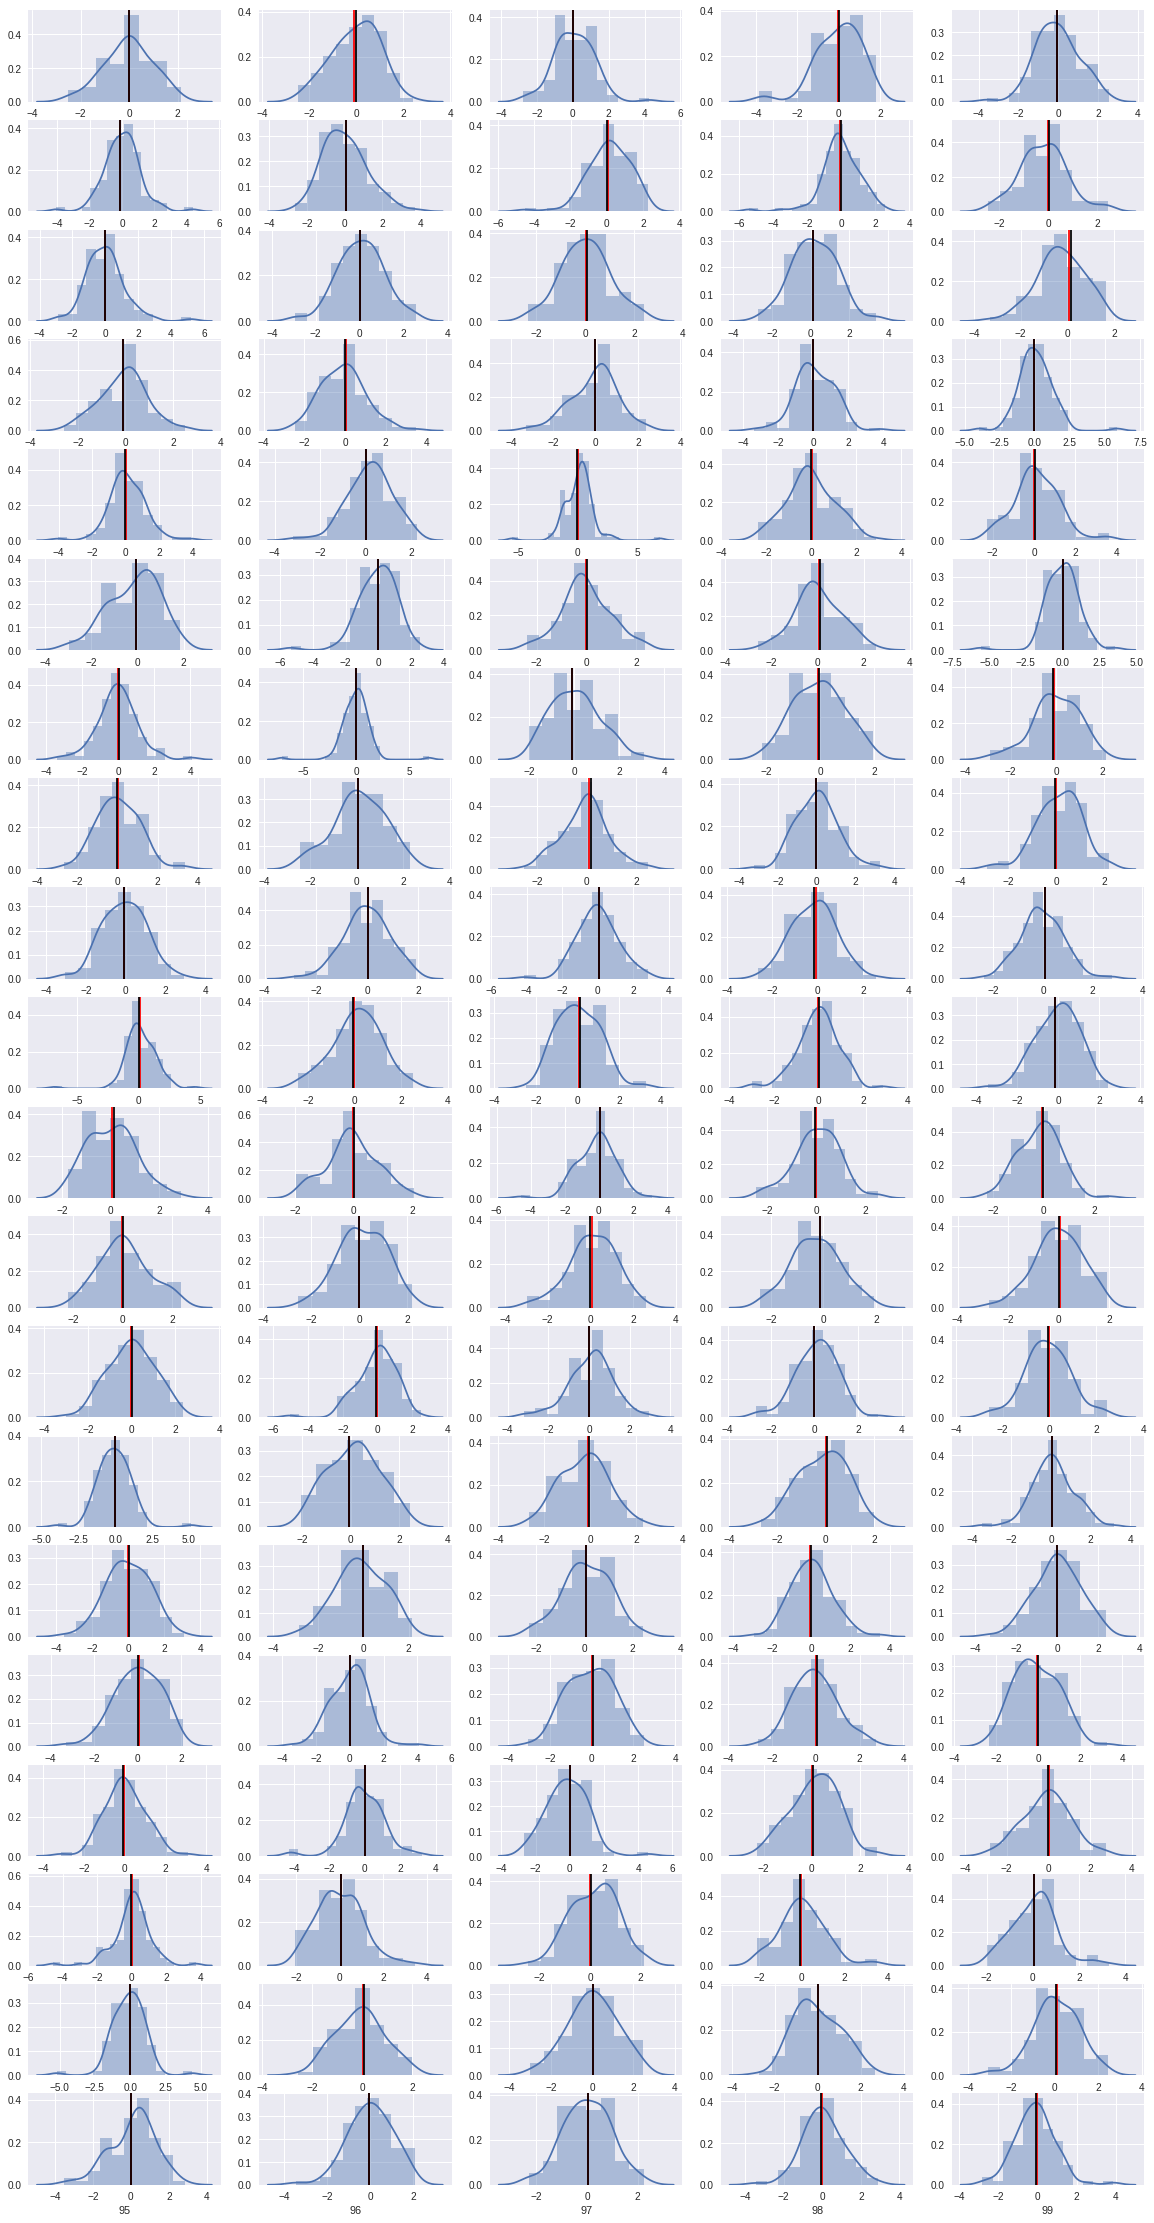

In [24]:
distplot_df_cols(cook_sampled_cols)

#### Observations - BOTH Madelon Dataset and Cook's Make Classification Dataset
* There are features that are skewed (where the mean and the median are not the same)
* There are features that are have bimodal distribution
* There appear to be featuers with outliers as well

**Generate Scatter Plots to look at Feature relationships:**
Notably the features in each of the Madelon and Cook dataset are not linearly separable as evidenced by setting the color code to the two classes for each of the datasets (since both datasets are binary classification problems).

**Madelon Scatter Plots for 10 features**

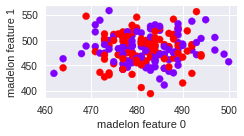

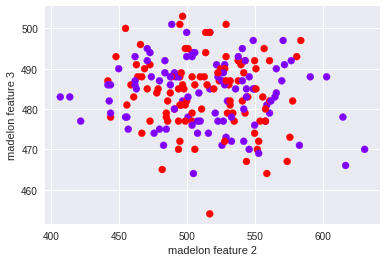

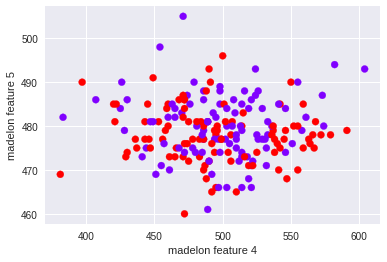

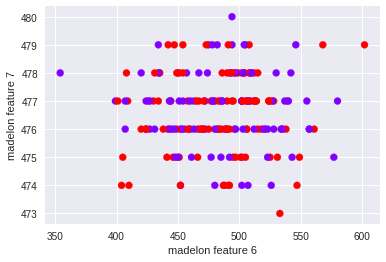

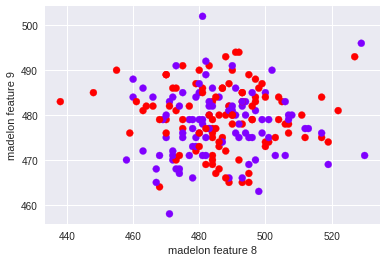

In [25]:
fig = plt.figure(1, figsize=(20,40))

for i in range(0, 10, 2):
    fig.add_subplot(20,5,i+1)
    plt.scatter(madelon_train_10.iloc[:, i], madelon_train_10.iloc[:, i+1], \
                c=madelon_train_label10, cmap='rainbow')
    plt.xlabel('madelon feature {}'.format(madelon_train_10.columns[i]))
    plt.ylabel('madelon feature {}'.format(madelon_train_10.columns[i+1]))
    plt.show()
   

**Cook Scatter Plots for 5 features**

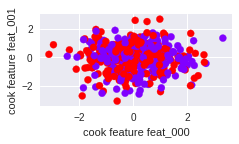

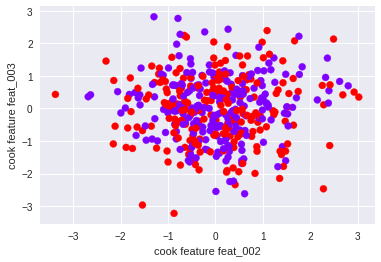

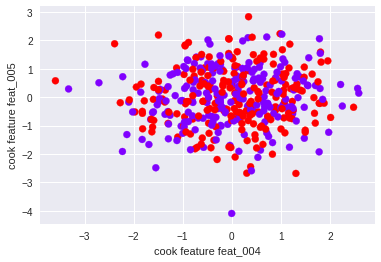

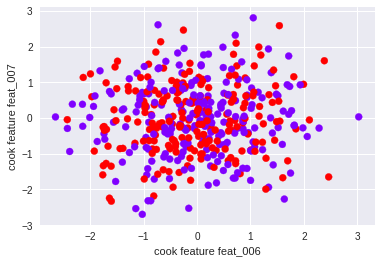

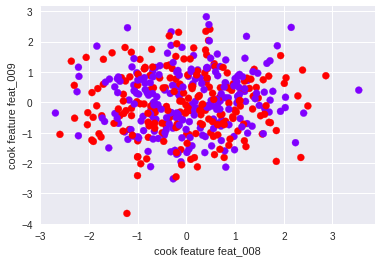

In [26]:
fig = plt.figure(1, figsize=(20,40))

for i in range(0, 10, 2):
    fig.add_subplot(20,5,i+1)
    plt.scatter(cook_features.iloc[:, i], cook_features.iloc[:, i+1], \
                c=cook_target, cmap='rainbow')
    plt.xlabel('cook feature {}'.format(cook_features.columns[i]))
    plt.ylabel('cook feature {}'.format(cook_features.columns[i+1]))
    plt.show()
   

### Unsupervised Learning on the Training Data (without Labels)

### Method 1: Calculate the R^2 Score to tease out noise
Calculate the R^2 score repeatedly for each of the features to see which of the features are linearly dependent vs. linearly independent. If they are linearly dependent, then they could be one of the (I) informative or (II) redundant features, but certainly not the noise. The noisy features will be linearly indepedent and therefore not return a good R^2 score. 

In [77]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

The below function will generate an R^2 score for a target vs. the other features. This function will be used to iterate through all of the 500 features in the Madelon dataset and all 1,000 features in the Cook dataset to help identify which of the features are considered noise vs. not noise. Further, this process will be run several times over because the R^2 score might change with each iteration. Ultimately the mean R^2 score will be calculate for each feature and the mean will drive the decision-making on which of the features are considered noise vs. not noise.

**The two models selected for deriving the R^2 score will be non-linear regression algorithms due to the non-linear nature of the data (as visualized in the cells above):**
1. KNeighbors Regressor
2. DecisionTree Regressor

In [28]:
def calculate_r_2_for_feature(data,feature):
    new_data = data.drop(feature, axis=1)

    X_train, \
    X_test,  \
    y_train, \
    y_test = train_test_split(
        new_data,data[feature],test_size=0.25
    )

    regressor = KNeighborsRegressor()
    regressor.fit(X_train,y_train)

    score = regressor.score(X_test,y_test)
    return score

Note that each time the R2 score is calcualted for each feature, the R2 score changes.
Therefore, calculate the R2 score multiple times and then obtain the mean to determine which features to keep vs. eliminate.

In [31]:
def calculate_mean_r_2 (data, feature, iteration=200):
    '''
    iteration default set to 200
    iteration can be specified (type int)
    '''
    scores = []
    for i in range(iteration):
        scores.append(calculate_r_2_for_feature(data, feature))
    
    scores = np.array(scores)
    return scores.mean()

In [33]:
madelon_avg_r2_feature_scores = []

for column in madelon_train_10.columns:
    score = calculate_mean_r_2(madelon_train_10, column)
    madelon_avg_r2_feature_scores.append(score)

In [34]:
madelon_inf_red_feat_indices = [i for i, r2 in enumerate(madelon_avg_r2_feature_scores) if r2 > 0]
madelon_inf_red_feat_indices

[28,
 48,
 64,
 105,
 128,
 153,
 241,
 281,
 318,
 336,
 338,
 378,
 433,
 442,
 451,
 453,
 455,
 472,
 475,
 493]

As shown in the cells below, the DecisionTree R2 feature noise eliminator will yield the same results as the KNeighborsRegressor R2 feature noise eliminator. In the interest of time, and memory, I did not confirm the same for the Cook dataset, but it is true of the Madelon dataset.

In [70]:
def calculate_r_2_for_feature_dectree(data,feature):
    new_data = data.drop(feature, axis=1)

    X_train, \
    X_test,  \
    y_train, \
    y_test = train_test_split(
        new_data,data[feature],test_size=0.25
    )

    regressor = DecisionTreeRegressor()
    regressor.fit(X_train,y_train)

    score = regressor.score(X_test,y_test)
    return score

In [71]:
def calculate_mean_r_2_dectree (data, feature, iteration=200):
    '''
    iteration default set to 200
    iteration can be specified (type int)
    '''
    scores = []
    for i in range(iteration):
        scores.append(calculate_r_2_for_feature_dectree(data, feature))
    
    scores = np.array(scores)
    return scores.mean()

#### Madelon Dataset

In [39]:
madelon_avg_r2_feature_scores_dectree = []

for column in madelon_train_10.columns:
    score = calculate_mean_r_2_dectree(madelon_train_10, column)
    madelon_avg_r2_feature_scores_dectree.append(score)

In [40]:
madelon_inf_feat_dectree = [i for i, r2 in enumerate(madelon_avg_r2_feature_scores_dectree) \
                            if r2 > 0]
madelon_inf_feat_dectree

[28,
 48,
 64,
 105,
 128,
 153,
 241,
 281,
 318,
 336,
 338,
 378,
 433,
 442,
 451,
 453,
 455,
 472,
 475,
 493]

#### Cook Dataset

In [35]:
cook_avg_r2_feature_scores = []

for column in cook_features.columns:
    score = calculate_mean_r_2(cook_features, column)
    cook_avg_r2_feature_scores.append(score)

In [36]:
cook_inf_red_feat_indices = [i for i, r2 in enumerate(cook_avg_r2_feature_scores) if r2 > 0]
cook_inf_red_feat_indices

[257,
 269,
 308,
 315,
 336,
 341,
 395,
 504,
 526,
 639,
 681,
 701,
 724,
 736,
 769,
 808,
 829,
 867,
 920,
 956]

### Method 2: Calculate Pearson Correlation between Features to tease out noisy features
Generate correlation matrices for each of the datasets to see if this is congruent with the R^2 test findings as to which features are considered: (I) informative, (II) redundant, or (III) noise.

##### Madelon Dataset

In [25]:
madelon_train_corr = madelon_train_10.corr()

In [58]:
top20_corr_madelon = madelon_train_corr[madelon_train_corr[madelon_train_corr >0.5].count() > 1]

In [59]:
madelon_20_relevant_feat_corr = top20_corr_madelon[top20_corr_madelon.index]

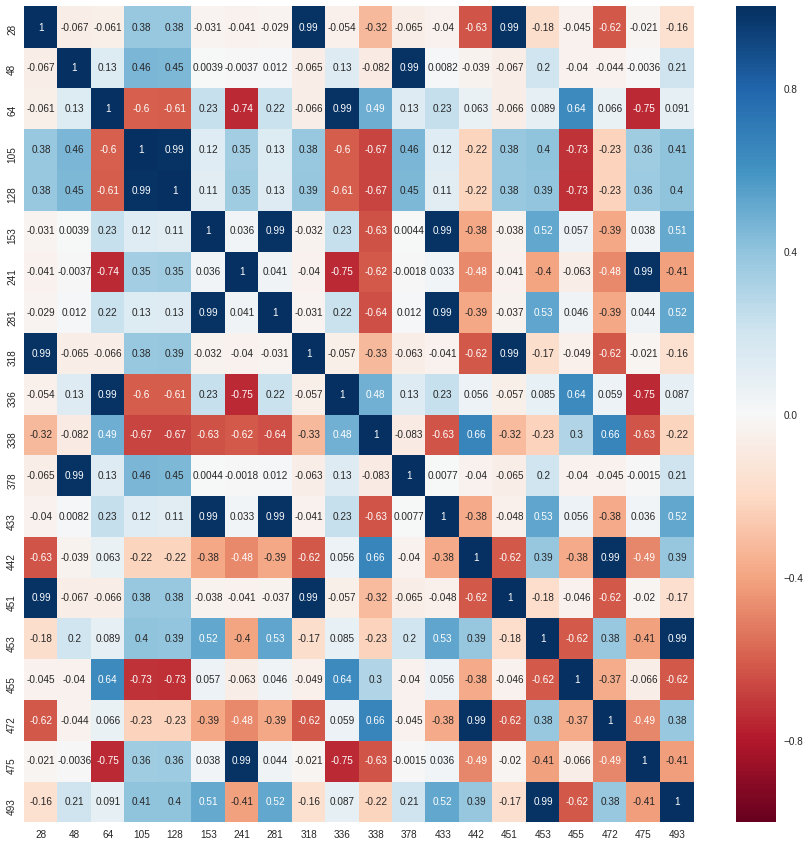

In [65]:
# mask = np.zeros_like(madelon_20_relevant_feat_corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(madelon_20_relevant_feat_corr, cmap='RdBu', annot=True)
plt.show()

**Observations**
- Identical correlations between features are:
    -  28 and 318 and 451
    -  48 and 378  
    -  64 and 336
    - 105 and 128
    - 153 and 281 and 433
    - 241 and 475
    - 442 and 472
    - 453 and 493



- Features with unique correlations:
    - 338
    - 455

##### Cook Dataset

In [40]:
cook_corr_matrix = cook_features.corr()

In [99]:
cook_corr_matrix[cook_corr_matrix[cook_corr_matrix > 0.5].count() > 1]

,feat_000,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,...,feat_990,feat_991,feat_992,feat_993,feat_994,feat_995,feat_996,feat_997,feat_998,feat_999
feat_257,0.007741,-0.000712,-0.008547,0.007695,-0.026263,-0.007942,0.009448,-0.004151,-0.008501,-0.000404,...,0.033246,-0.016482,0.010649,-0.014442,-0.005941,0.012468,-0.018453,0.016504,-0.005207,-0.016050
feat_269,-0.016639,0.017160,0.013551,-0.002603,0.018899,-0.018197,0.004520,0.006367,-0.019027,0.007918,...,-0.026420,0.013802,-0.003881,-0.022480,0.025558,0.016179,0.020822,-0.026643,-0.006106,0.010582
feat_308,-0.013825,-0.010429,-0.014948,-0.006927,0.000764,0.013403,-0.009436,-0.010993,0.009524,0.010852,...,0.026602,-0.000780,0.016245,-0.038731,-0.003154,-0.011638,0.005353,-0.031260,0.007581,0.000218
feat_315,-0.007060,0.015477,0.013759,-0.009276,0.024617,-0.011232,-0.002595,0.008660,-0.015915,0.001671,...,-0.038681,0.016658,0.002867,0.006711,0.021206,0.015257,0.024009,-0.016206,-0.007702,0.015299
feat_336,0.005918,0.011602,0.008650,0.012738,-0.007064,-0.010474,0.022898,0.012131,-0.006378,-0.002182,...,0.004079,-0.020393,-0.012745,-0.011339,-0.004474,-0.003853,-0.005346,0.013255,0.000264,-0.017774
feat_341,-0.003991,0.016679,0.008666,0.002150,0.012255,-0.004747,0.019391,0.015630,-0.007430,0.004614,...,-0.003460,-0.018523,0.000664,-0.032260,0.001180,-0.010467,0.016527,-0.016266,0.002891,-0.013128
feat_395,-0.001509,0.015771,0.015994,0.000893,0.024751,0.001113,0.015624,0.020252,0.001191,-0.000188,...,-0.026996,-0.010992,-0.013094,-0.006459,-0.000675,-0.021027,0.021416,-0.011376,0.006509,-0.005530
feat_504,0.014971,0.007308,-0.002954,-0.009206,0.011190,0.016833,0.009225,0.015858,0.004549,-0.003688,...,0.005624,-0.029690,0.025746,-0.001996,-0.019297,-0.022341,0.016042,-0.000728,0.004731,-0.017451
feat_526,0.001022,0.001633,0.000966,-0.004820,-0.006054,-0.016148,-0.012148,-0.008380,-0.018437,-0.002240,...,-0.012533,0.022623,0.009151,0.023318,0.018726,0.037564,-0.004346,0.010060,-0.015548,0.015960
feat_639,0.011065,0.003895,-0.003549,0.005055,-0.007568,0.007223,0.017652,0.010122,0.004350,-0.001799,...,0.023240,-0.032542,0.007620,-0.016926,-0.019302,-0.018905,-0.002772,0.008085,0.005719,-0.024442


In [91]:
top20_cook_feat = cook_corr_matrix[cook_corr_matrix[cook_corr_matrix > 0.5].count()>1]
top20_cook_feat[top20_cook_feat.index].shape

(20, 20)

In [120]:
cook_relevant_feat_corr = top20_cook_feat[top20_cook_feat.index]

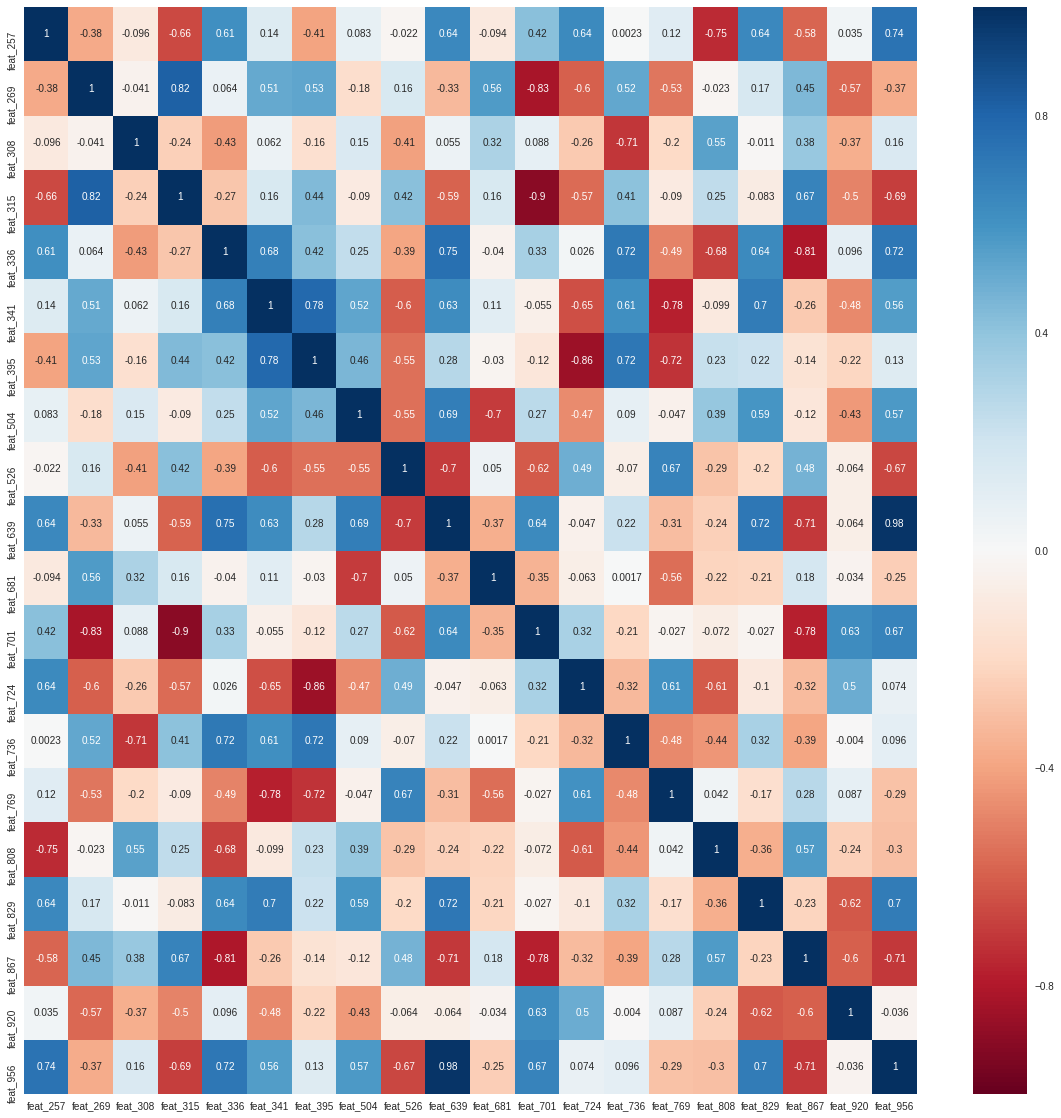

In [121]:
f, ax = plt.subplots(figsize=(20,20))

sns.heatmap(cook_relevant_feat_corr, cmap='RdBu', annot=True)
plt.show()

**Notes**
- In this dataset, it is significantly harder to tease out the informative from the redundant features.